<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자산총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자산총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정 (종목명은 Lecture Note를 참조)
- 이후 `concat`으로 합치기
- 합친 이후의 index는 `분기`로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [ ]:
# Font

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 데이터를 1개로 합치기
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'

def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose() #csv 호출 후 column <-> row
    new_header = df.iloc[0] # df의 첫번째 줄을 iloc을 사용해서 new_header란 변수에 저장
    df = df[1:] #df = df의 두 번째 줄 부터로 덮어씌움
    df.columns = new_header # 저장해두었던 new_header을 df의 header(0th column)
    return df[-1:]

df = pd.concat([mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])
df = df[['매출액','자산총계','EPS(원)']] # 원하는 feature로 df 변경

df = df.reset_index() # index reset(new)

df = df.drop(df.columns[0], axis=1) # 0번째 column delete(2020~) 

df


Unnamed: 0,매출액,자산총계,EPS(원)
0,"6,243","39,617",453
1,205,"1,555",3
2,"5,980","34,066","1,682"
3,521,"1,897",-61
4,"4,108","18,966","1,168"
5,"2,613","8,550",62


In [ ]:
df1 = pd.DataFrame(
    {'종목' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림', '선진'], 
     '테마' : ['주류', '주류', '주류', '육계', '육계', '육계', '돼지고기']}
)
df1

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계
6,136490,선진,돼지고기


In [ ]:
dff = pd.concat([df1, df], axis = 1) # 옆으로 df와 df1 이어붙임


# Feature 테마 없애기

dff = dff.drop(dff.columns[2],axis=1)
dff

,종목,종목명,매출액,자산총계,EPS(원)
0,000080,하이트진로,"6,243","39,617",453
1,000890,보해양조,205,"1,555",3
2,005300,롯데칠성,"5,980","34,066","1,682"
3,027740,마니커,521,"1,897",-61
4,035810,이지홀딩스,"4,108","18,966","1,168"
5,136480,하림,"2,613","8,550",62
6,136490,선진,NaN,NaN,NaN


In [ ]:
# 제일 아랫줄 선진이라는 종목에 값들이 NaN이므로 지워줌

dff = dff.drop(6)
dff

,종목,종목명,매출액,자산총계,EPS(원)
0,000080,하이트진로,"6,243","39,617",453
1,000890,보해양조,205,"1,555",3
2,005300,롯데칠성,"5,980","34,066","1,682"
3,027740,마니커,521,"1,897",-61
4,035810,이지홀딩스,"4,108","18,966","1,168"
5,136480,하림,"2,613","8,550",62


## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




,종목명,Feature,Value
0,하이트진로,매출액,6243
1,보해양조,매출액,205
2,롯데칠성,매출액,5980
3,마니커,매출액,521
4,이지홀딩스,매출액,4108
5,하림,매출액,2613
6,하이트진로,자산총계,39617
7,보해양조,자산총계,1555
8,롯데칠성,자산총계,34066
9,마니커,자산총계,1897


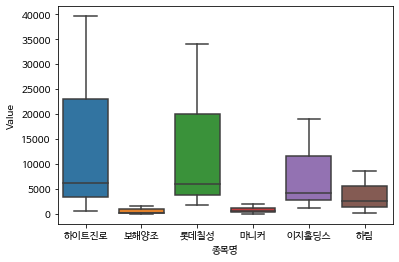

In [ ]:
# 방금 만든 데이터를 아래 예시와 같은 tidy 형태로 만드세요.

import seaborn as sns

df_tidy = dff.melt(id_vars=['종목명'],value_vars=['매출액','자산총계','EPS(원)']) # 이거 공부해야되겠다 잘 이해가 안간다ㅠㅠ

df_tidy = df_tidy.rename({'variable':'Feature','value':'Value'},axis='columns')

df_tidy.dtypes

def toInt(string):
  return int(string.replace(',',''))

df_tidy['Value'] = df_tidy['Value'].apply(toInt)

df_tidy

'''참고
numeric_value = []
df_tidy["value"] = numeric_value
df_tidy
'''

sns.boxplot(data=df_tidy, x='종목명',y='Value') #x, y가 numeric이 아니여서 int로 바꿔줘야함

#res

res=6 #6개의 박스(하이트진로, 보해양조, 롯데칠성, 마니커, 이지홀딩스, 하림)

df_tidy

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [ ]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
df2 = left.merge(right, how ='left', on=['key1','key2'])
df.style.hide_index()
df2

# right: object to merge with
# 나는 left 를 중심으로 right를 가져와 merge 했음
# 위 결과물에 key1이 순서대로 있길래 how ='left'로 merge
# index merge -: two factors in 'on'
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [ ]:
# 예시
import pandas as pd
import seaborn as sns

dat = pd.DataFrame({
    'name' : ['해운', '마리화나(대마)'],
    'value' : [10000,5000]
})

dat

,name,value
0,해운,10000
1,마리화나(대마),5000


In [ ]:
# csv 형태로 수집 - 첫번째 표


dat = pd.DataFrame({
    '테마': ['해운','해운','해운','마리화나(대마)','마리화나(대마)','마리화나(대마)'],
    '종목명' : ['대한해운','팬오션','KSS해운','에스엘바이오닉스','오성첨단소재','에이아이비트'],
    '매출액' : [8841,24972,2262,286,796,292],
    '자본총계': [8533,28067,2810,470,1944,453],
    'EPS':[316,326,1098,-266,42,-321]})

dat = dat.drop(dat.columns[0], axis=1)

dat

,종목명,매출액,자본총계,EPS
0,대한해운,8841,8533,316
1,팬오션,24972,28067,326
2,KSS해운,2262,2810,1098
3,에스엘바이오닉스,286,470,-266
4,오성첨단소재,796,1944,42
5,에이아이비트,292,453,-321


In [ ]:
# 두번째 표
dat_subset= dat.groupby('테마').sum()
dat_subset

,매출액,자본총계,EPS
테마,,,
마리화나(대마),1374,2867,-545
해운,36075,39410,1740


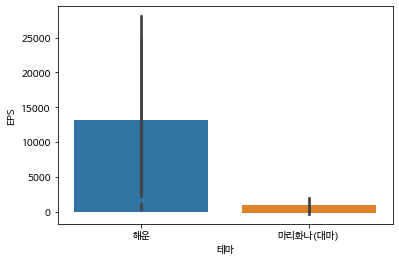

In [ ]:
# seaborn_ barplot visualization

sns.barplot(x = '테마', y = '매출액', data = dat);
sns.barplot(x = '테마', y = '자본총계', data = dat);
sns.barplot(x = '테마', y = 'EPS', data = dat);
#sns.barplot(x = '종목명', y = '매출액', data = dat);

